In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import matplotlib as mpl
from math import floor

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

In [4]:
lineal0 = lambda x,a : a*x

In [79]:
def worker_lineal(n,R_0,err_R_0):
    df = pd.read_csv(f'{n}.csv',header=None,names=['t','V_0','V'],usecols=[3,4,10])
    
    pars,cov = cf(lineal0,df['V_0'],df['V'])
    a = pars[0]
    err_a = cov[0,0]
    x_adj = np.linspace(min(df['V_0']),max(df['V_0']),100)
    y_adj = lineal0(x_adj,a)

    R_i=(R_0-R_0*a)/a
    err_R_i = np.sqrt(((1-a)*err_R_0/a)**2+((R_0/a**2)*err_a)**2)
    
    plt.plot(df['t'],df['V_0'],'crimson',label='Señal enviada',zorder=1)
    plt.plot(df['t'],df['V'],'navy',label='V medido',zorder=2)
    plt.xlabel('$t$ [s]')
    plt.ylabel('$V$ [V]')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc=2,fontsize=15)
    plt.show()
    plt.scatter(df['V_0'],df['V'],c='navy',label='Datos',zorder=1)
    plt.plot(x_adj,y_adj,'crimson',label='Ajuste',zorder=2)
    plt.xlabel('$V_{0}$ [V]')
    plt.ylabel('V [V]',c='tab:orange',weight='semibold')
    plt.tight_layout()
#    plt.title(titles[n],fontsize=15)
    plt.grid()
    plt.legend(loc=2,fontsize=18)
#    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#    plt.text(0.4,-0.9,'$R_{i} = $'+f'({np.round(R_i,dcmls(err_R_i))} ± {np.round(err_R_i,dcmls(err_R_i))}) k\Omega$',fontsize=14,verticalalignment='top',bbox=props)
    plt.savefig(f'plots/{n} - V0_V.png')
    plt.show()
    
    return R_i,err_R_i

titles = {1:'Potencial medido para una rampa de 40 Hz',2:'Potencial medido para una rampa de 150 Hz',3:'Potencial medido para una sinusoide de 40 Hz',
          4:'Potencial medido para una sinusoide de 150 Hz',5:'Potencial medido para una cuadrada de 40 Hz',6:'Potencial medido para una rampa de 1 MHz'}

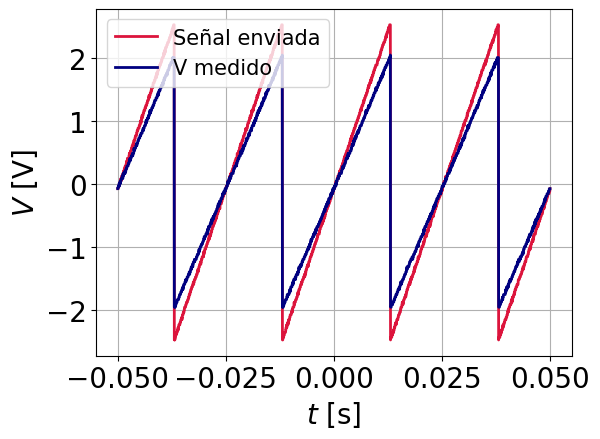

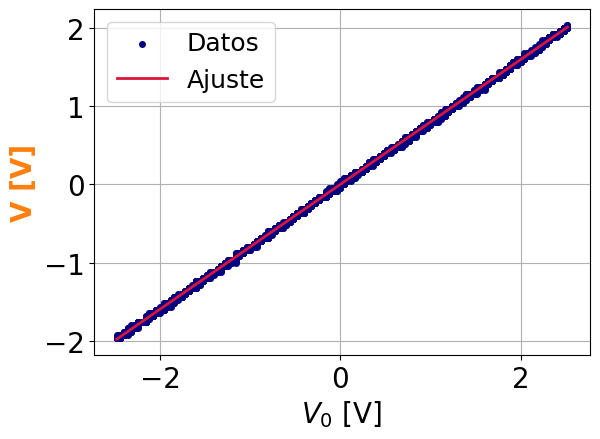

(1.2307084319084727, 0.02001681153072072)

In [80]:
worker_lineal(1,R_p,err_R_p)

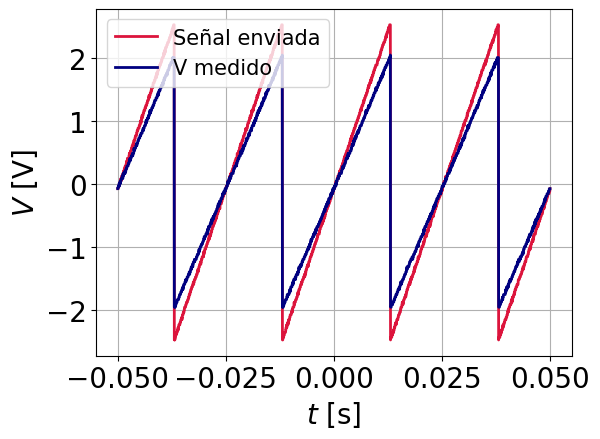

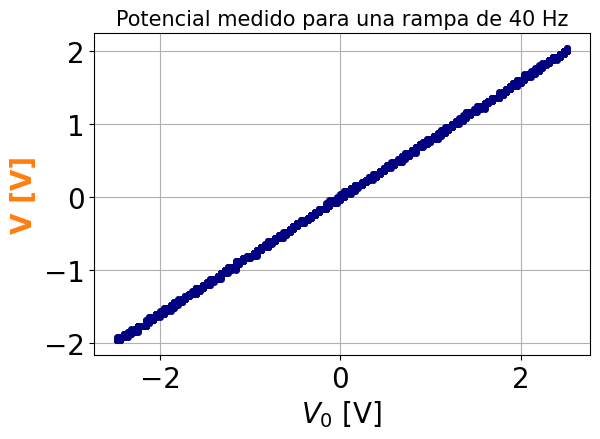

(1.2307084319084727, 0.02001681153072072)


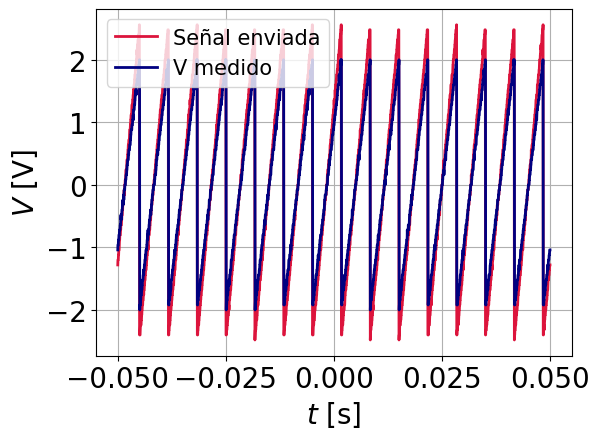

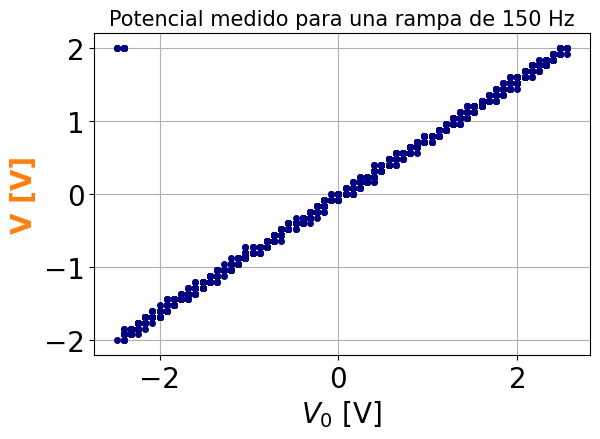

(1.421544080782, 0.023120860629880287)


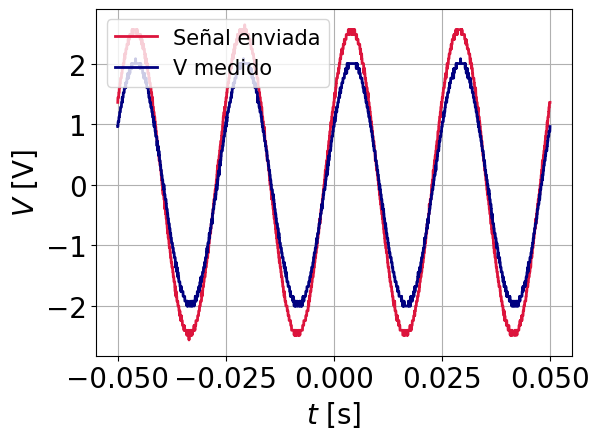

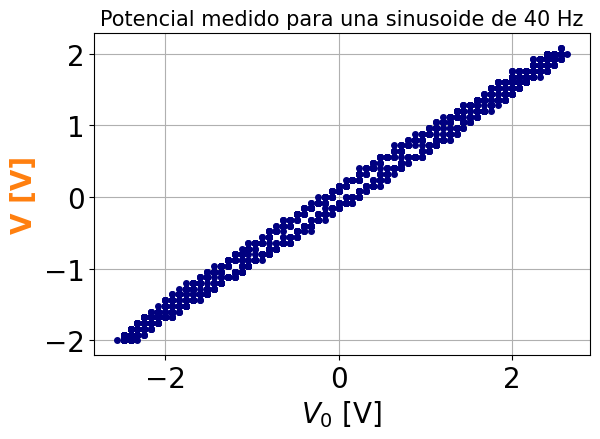

(1.2736204579508226, 0.020714754445609513)


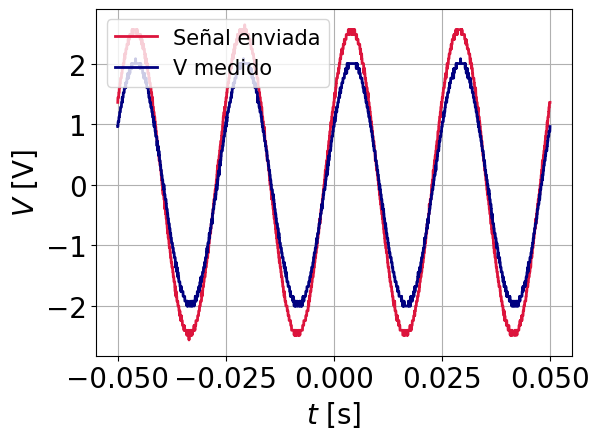

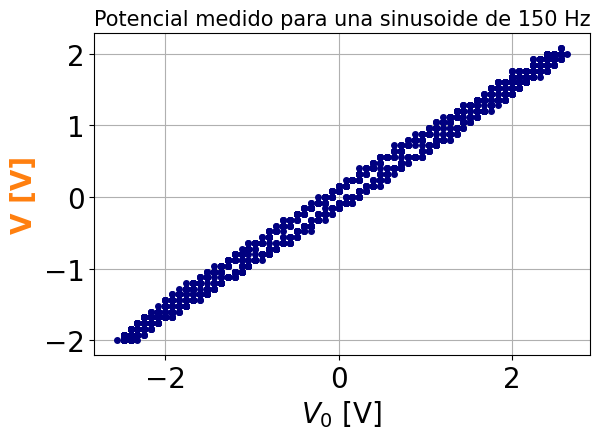

(1.2736204579508226, 0.020714754445609513)


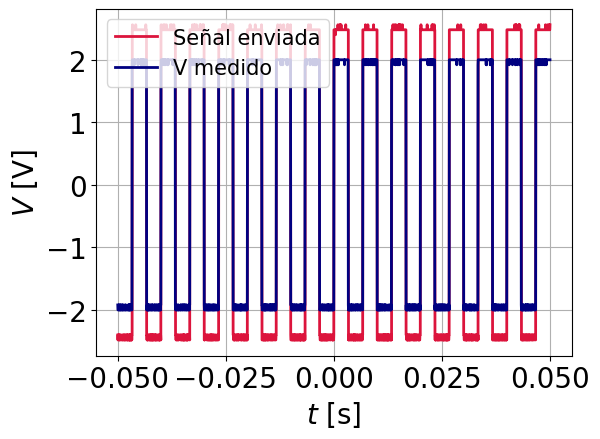

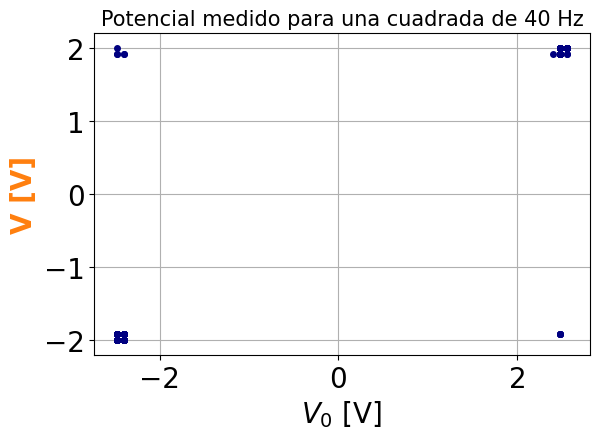

(1.2188674679199187, 0.019824249432312657)


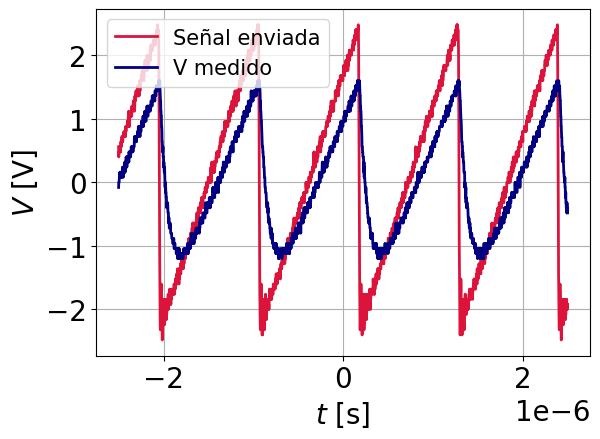

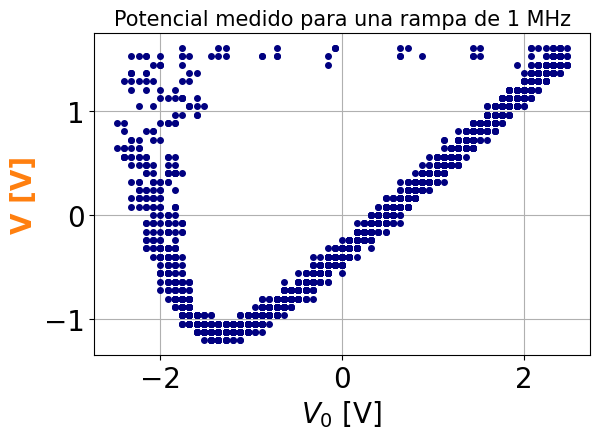

(5.949019601394957, 0.09677047039351279)


In [73]:
R_p = 4.84
err_R_p = (0.008*R_p++1*0.04)

for i in range(1,7):
    print(worker_lineal(i,R_p,err_R_p))

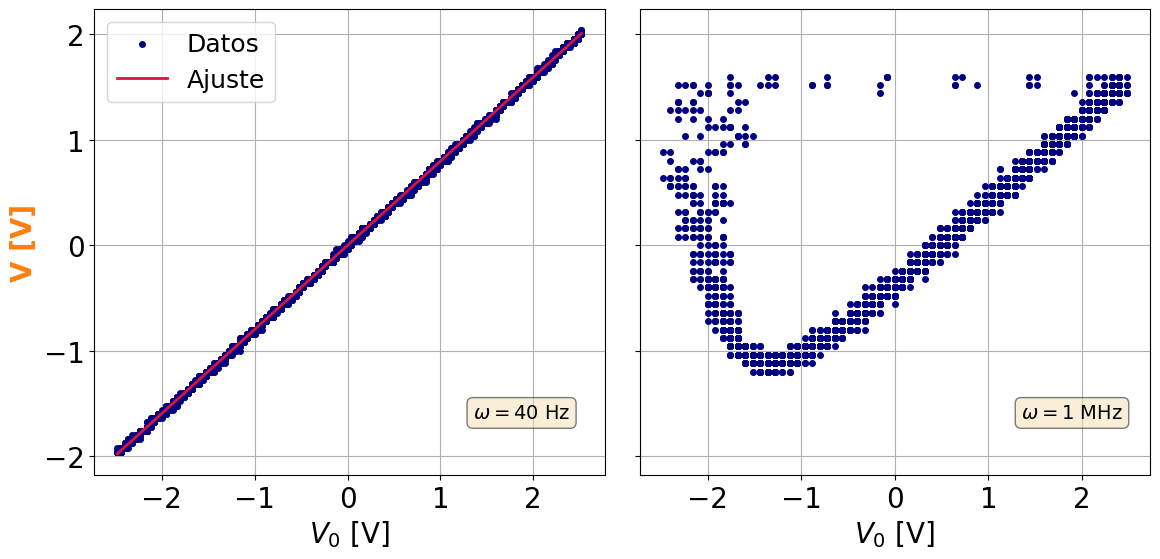

In [130]:
df1 = pd.read_csv('1.csv',header=None,names=['t','V_0','V'],usecols=[3,4,10])
df6 = pd.read_csv('6.csv',header=None,names=['t','V_0','V'],usecols=[3,4,10])

pars1,cov1 = cf(lineal0,df1['V_0'],df1['V'])
a1 = pars1[0]
err_a1 = cov1[0,0]
x_adj1 = np.linspace(min(df1['V_0']),max(df1['V_0']),100)
y_adj1 = lineal0(x_adj1,a1)

#plt.scatter(df1['V_0'],df1['V'],c='navy',label='Datos',zorder=1)
#plt.plot(x_adj1,y_adj1,'crimson',label='Ajuste',zorder=2)
#plt.xlabel('$V_{0}$ [V]')
#plt.ylabel('V [V]',c='tab:orange',weight='semibold')
#plt.tight_layout()
#plt.grid()
#plt.legend(loc=2,fontsize=18)
#
#plt.scatter(df6['V_0'],df6['V'],c='navy',label='Datos',zorder=1)
#plt.xlabel('$V_{0}$ [V]')
#plt.ylabel('V [V]',c='tab:orange',weight='semibold')
#plt.tight_layout()
#plt.grid()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, axs = plt.subplots(1, 2, figsize=(12, 6),sharey=True)

axs[0].scatter(df1['V_0'], df1['V'], c='navy', label='Datos', zorder=1)
axs[0].plot(x_adj1, y_adj1, 'crimson', label='Ajuste', zorder=2)
axs[0].set_xlabel('$V_{0}$ [V]')
axs[0].set_ylabel('V [V]', c='tab:orange', weight='semibold')
axs[0].grid()
axs[0].legend(loc=2,fontsize=18)
axs[0].text(1.35,-1.5,'$\omega = 40$ Hz',fontsize=14,verticalalignment='top',bbox=props)

axs[1].scatter(df6['V_0'], df6['V'], c='navy', label='Datos', zorder=1)
axs[1].set_xlabel('$V_{0}$ [V]')
axs[1].grid()
axs[1].text(1.35,-1.5,'$\omega = 1$ MHz',fontsize=14,verticalalignment='top',bbox=props)

plt.tight_layout()
plt.savefig('plots/figura.png')